# 6.7 Keras

En este ejercició tenemos un set de datos con las transacciones realizadas con tarjetas de credito de un banco.

Estan classificadas segun si son fraudulentas o no, el total de transacciones es de 284.807 donde solo 492 son fraudulentas y los valores del data set son solo numericos y corresponden al resultado de aplicar un analisis de componentes principales.

Nuestro objetivo es generar un modelo de red neuronal con Keras para detectar casos de transacciones fraudulentas.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de datos</a></span></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Preprocessing-de-los-datos" data-toc-modified-id="Preprocessing-de-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing de los datos</a></span><ul class="toc-item"><li><span><a href="#Muestreo" data-toc-modified-id="Muestreo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Muestreo</a></span></li><li><span><a href="#Normalización" data-toc-modified-id="Normalización-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Normalización</a></span></li><li><span><a href="#Balanceo-de-los-datos" data-toc-modified-id="Balanceo-de-los-datos-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Balanceo de los datos</a></span></li></ul></li><li><span><a href="#Entrenamiento-de-los-modelo" data-toc-modified-id="Entrenamiento-de-los-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Entrenamiento de los modelo</a></span><ul class="toc-item"><li><span><a href="#Parámetros-de-los-modelos" data-toc-modified-id="Parámetros-de-los-modelos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parámetros de los modelos</a></span></li><li><span><a href="#Modelo-1:-sin-balancear-y-con-2-neuronas-en-la-capa-de-salida" data-toc-modified-id="Modelo-1:-sin-balancear-y-con-2-neuronas-en-la-capa-de-salida-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modelo 1: sin balancear y con 2 neuronas en la capa de salida</a></span></li><li><span><a href="#Modelo-2:-undersampling" data-toc-modified-id="Modelo-2:-undersampling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Modelo 2: undersampling</a></span></li><li><span><a href="#Modelo-3:-oversampling" data-toc-modified-id="Modelo-3:-oversampling-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Modelo 3: oversampling</a></span></li><li><span><a href="#Modelo-4:-otorgando-pesos-a-las-clases-en-los-parámetros-del-modelo" data-toc-modified-id="Modelo-4:-otorgando-pesos-a-las-clases-en-los-parámetros-del-modelo-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Modelo 4: otorgando pesos a las clases en los parámetros del modelo</a></span><ul class="toc-item"><li><span><a href="#Formas-de-balancear" data-toc-modified-id="Formas-de-balancear-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Formas de balancear</a></span></li></ul></li></ul></li></ul></div>

<h1>Introducción a Keras<span class="tocSkip"></span></h1>
<h2>Marc Jovaní y Laura Oliva Trastoy<span class="tocSkip"></span></h2>

# Librerías <span class="tocSkip">

In [1]:
# Librerías para el tratamiento de los datos:
# ----------------------------------------------------------------------------------------------------------------------
import numpy as np
from pandas import Int64Index as NumericIndex  
import pandas as pd

# Librerías para la realización de gráficos:
# ----------------------------------------------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Librerías para el procesado y modelado de los datos:
# ----------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

# Configuración de los warnings:
import warnings
warnings.filterwarnings('ignore')

# Opcion para no limitar las filas y columnas que muestra pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Carga de datos 

In [2]:
# Importamos el archivo csv
#df = pd.read_csv('data/creditcard.csv', header = 0)

# Cargamos los datos a un DataFrame directamente des del archivo zip
df = pd.read_csv('data/creditcard.zip', compression='zip', header=0, sep=',', quotechar='"')

# Análisis exploratorio

In [3]:
# Comprobamos las dimensiones de nuestro dataset
df.shape

(284807, 31)

In [4]:
# Vemos una muestra los datos
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# Vemos una muestra de los últimos datos del dataframe
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Comprobamos el tipo de variables que tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Vemos los rangos de valores de las variables predictoras.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Comprobamos que los valores de la variable target son correctos
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Veamos qué proporción del dataset supone cada clase en la variable dependiente
pos = df[df['Class'] == 1]
neg = df[df['Class'] == 0]

print("Total de la clase positiva: ", len(pos))
print("Total de la clase negativa: ", len(neg))
print(f'Porcentaje de la clase positiva: {round(len(pos)/(len(neg)/100), 2)}')

Total de la clase positiva:  492
Total de la clase negativa:  284315
Porcentaje de la clase positiva: 0.17


Respecto a nuestro dataset, vemos que:
* Tenemos un número considerable de registros: 284.807
* Tenemos también un número considerable de variables independientes: 30, todas de tipo numérico, y sin valores nulos. 
* La variable dependiente ya tiene un tipo numérico. Sin embargo, tenemos una muestra claramente desbalanceada. 
* La variable tiempo puede aportar mucho ruído al modelo, y en cambio aportar muy poco valor predictivo, puesto que lo que indica son los segundos transcurridos desde el primer registro hasta el último, los cuáles a su vez parecen haberse seleccionado de forma no premeditada. Así, parece un valor un tanto aleatorio, que más bien podría servir como índice que como variable predictora. Por tanto, decidimos eliminarla. 
* La variable amount tiene unos valores en un rango muy diferente al resto de valores, por lo que será recomendable normalizar los datos. 
* Nuestra clase positiva representa únicamente un 0.17% del total de la muestra, por lo que vamos a tener que probar con diferentes aproximaciones para tratar de controlar los efectos del desbalanceo.
* Podemos apreciar que los valores estan bien distribuidos, todas las variables del PCA estan centradas y no tienen colas demasiado grandes ni varianza grande en relacion a los valores absolutos.
* Por naturaleza del PCA los datos no deberian estar altamente correlacionados pero vamos a comprobarlo por si acaso.

In [10]:
# Eliminamos la variable tiempo
df = df.drop("Time", axis=1)
df.shape

(284807, 30)

<AxesSubplot:>

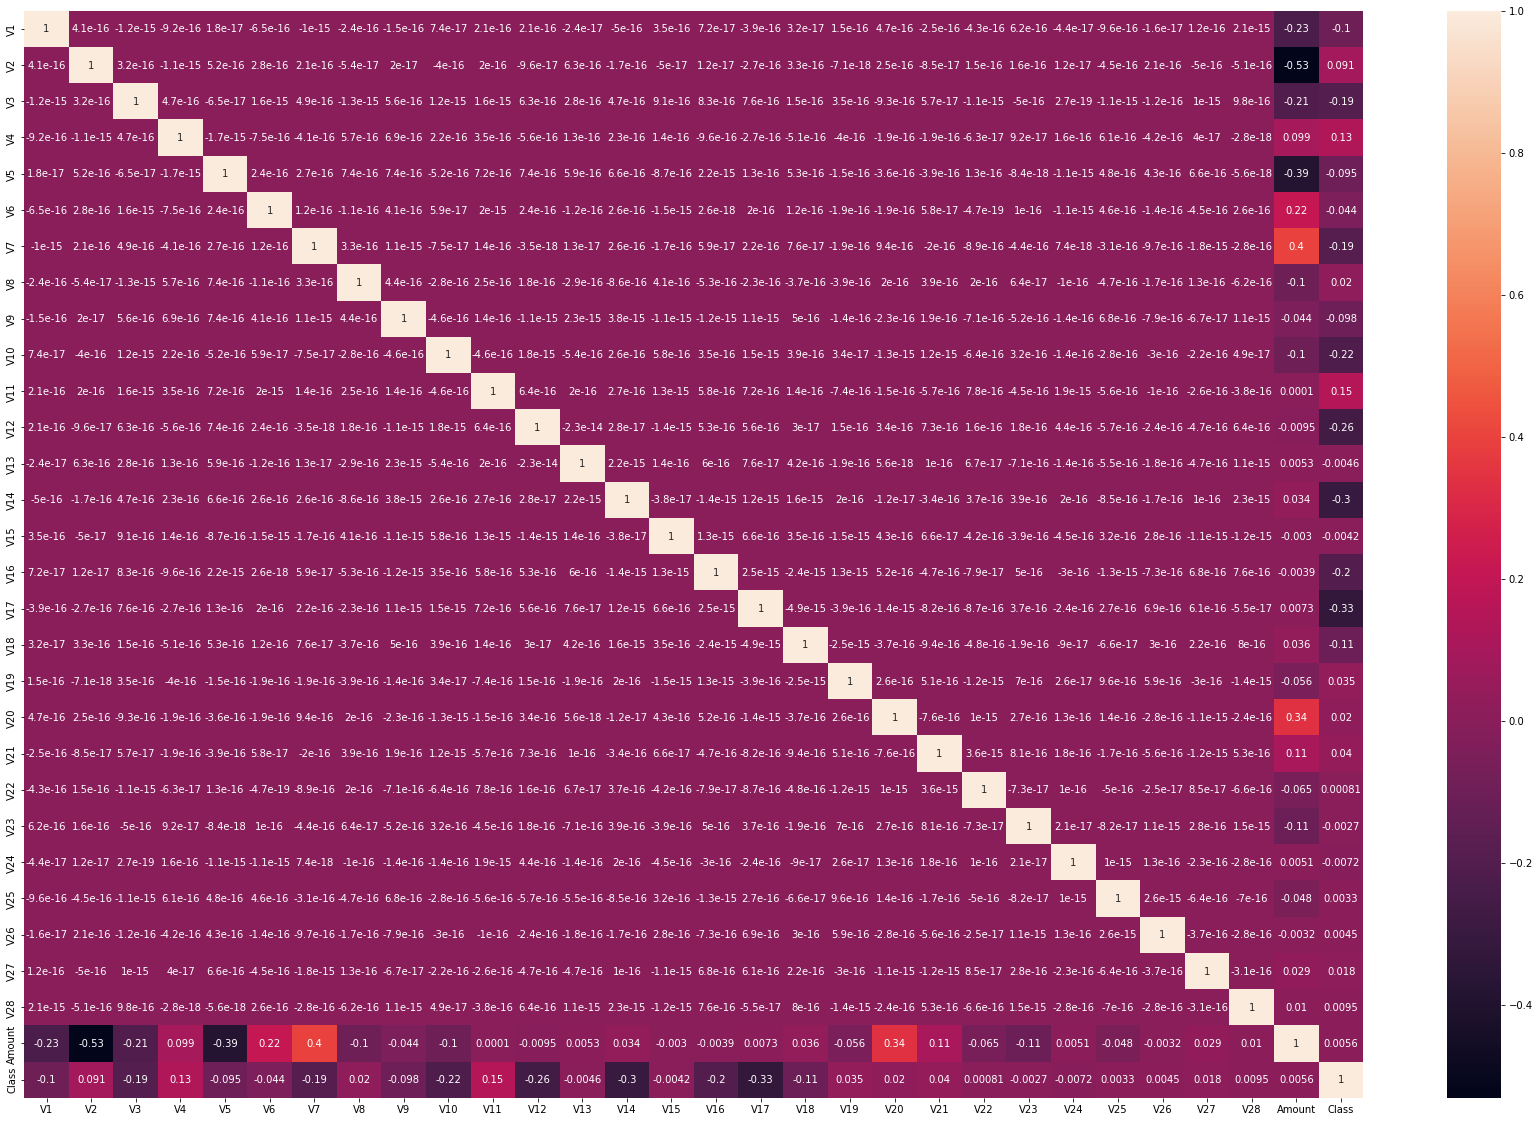

In [11]:
# Usamos la función heatmap de Seaborn en el dataset de vino rosado:

plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot = True)

Como esperabamos la correlación es infima.

Debido a que todos los datos parecen estar listos para usarse y que los outliers que pueda haber en las variables del PCA no podemos saber si realmente son datos anomalos ya que desconocemos su naturaleza, podemos usar este set de datos para trabajar en el modelo.

# Preprocessing de los datos

## Muestreo

In [12]:
# Aislamos la variable target y hacemos una copia del dataframe que asignamos a X

X = df.copy()
y = X.pop('Class')

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (284807, 29)
y shape:  (284807,)


In [13]:
# Dividimos los datos en train y test, y miramos cómo han quedado distribuidas las clases en los datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)

print("Distribución de las clases en entrenamiento sin balanceo: ", Counter(y_train))
print("Distribución de las clases en testeo sin balanceo: ", Counter(y_test))

Distribución de las clases en entrenamiento sin balanceo:  Counter({0: 199006, 1: 358})
Distribución de las clases en testeo sin balanceo:  Counter({0: 85309, 1: 134})


## Normalización

In [14]:
# Normalizamos los datos

normalizacion = StandardScaler().fit(X_train)
X_train = normalizacion.transform(X_train)
X_test = normalizacion.transform(X_test)

## Balanceo de los datos

Para tratar de controlar los efectos del desbalanceo de los datos, vamos a seguir tres estrategias:
1. Testear los modelos con los datos sin balancear pero con dos neuronas en la capa de salida, para tratar que una se especialice en detectar la clase positiva. 
2. Crear una versión de los datos en que balanceamos las clases: 
    * Primero, vamos a usar una under-sampling, esto es, reducir el peso de la categoría mayoritaria (en este caso, la clase negativa). 
    * Segundo, vamos a usar un over-sampling, esto es, vamos a aumentar el peso de la clase minoritaria. 
3. Utilizar los parámetros de keras para asignar pesos a las clases. 

In [15]:
# Usamos la función RandomUnderSample de ibmlearn con los datos de entrenamiento

undersample = RandomUnderSampler(sampling_strategy = 'majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("Antes de balancear: ", Counter(y_train))
print ('Después de balancear: ', Counter(y_train_under))

Antes de balancear:  Counter({0: 199006, 1: 358})
Después de balancear:  Counter({0: 358, 1: 358})


In [16]:
# Aplicamos también un oversampling con la función SMOTE, que añade datos artificiales a la clase minoritaria. 

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Antes de balancear: ', Counter(y_train))
print('Después de balancear: ', Counter(y_train_over))

Antes de balancear:  Counter({0: 199006, 1: 358})
Después de balancear:  Counter({0: 199006, 1: 199006})


Como podemos ver, con la estrategia de undersmapling hemos perdido muchos datos de testeo, mientras que con el oversampling hemos usado el algoritmo SMOTE para generar datos artificiales de la clase positiva.

La reducción de los datos en el undersampling puede generar que nuestra red neuronal tenga problemas para convergir, ademas elimina muchos registros de la classe mayoritaria cosa que puede llevar a over fitting. Veremos como responde al entrenamiento.

A continución, entrenamos las redes neuronales con las diferentes versiones de los datos. 

# Entrenamiento de los modelo

## Parámetros de los modelos

In [17]:
# Primero establecemos la semilla
tf.keras.backend.clear_session()
np.random.seed(2)
tf.random.set_seed(2)

In [18]:
# Definimos las métricas que querremos recoger del modelo
metrics = [keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')]

2022-05-08 20:33:50.180915: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Definimos el callback: elegimos EarlyStopping, que detiene el modelo cuando ya no mejora en la métrica escogida 
# Elegimos que pare cuando, en tres epochs consecutivas ("patience"), la función de coste deje de disminuir ("monitor")
# Es decir, cuando hayamos llegado al mínimo valor de la función de coste ("mode")

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3, mode = 'min')

# Definimos un callback para mostar la barra de progreso
tqdm_callback = tfa.callbacks.TQDMProgressBar()

## Modelo 1: sin balancear y con 2 neuronas en la capa de salida

In [20]:
# Para poder usar dos capas en la neurona de salida, hemos de convertir la variable target en test, en categórica

y_train_class = tf.keras.utils.to_categorical(y_train, num_classes=2, dtype = 'int64')
y_test_class = tf.keras.utils.to_categorical(y_test, num_classes=2, dtype = 'int64')

In [21]:
# Definimos el primer modelo, de tipo Sequential por estar en un proble clasificatorio
# con funciones de activación ReLu para capas hidden y Softmax para la capa de salida, puesto que usamos dos neuronas

model1 = Sequential(name = "Model1-non-balanced-data-and-2-neurones-in-output-layer")     

model1.add(Dense(29, input_shape=(29,), activation='relu', name = 'Input-layer')) 
model1.add(Dense(14, activation = 'relu', name = 'Hidden1', kernel_initializer='HeNormal'))
model1.add(Dense(7, activation = 'relu', name = 'Hidden2', kernel_initializer='HeNormal'))
model1.add(Dense(2, activation = 'softmax', name = 'Output'))


model1.compile(Adam(learning_rate=0.05), 'categorical_crossentropy', metrics = metrics) 

model1.summary()

Model: "Model1-non-balanced-data-and-2-neurones-in-output-layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 29)                870       
                                                                 
 Hidden1 (Dense)             (None, 14)                420       
                                                                 
 Hidden2 (Dense)             (None, 7)                 105       
                                                                 
 Output (Dense)              (None, 2)                 16        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fijamos el numero de iteraciones que queremos y el tamaño del batch y calculamos las epochs en funcion de estos
n_iters = len(X_train)
batch_s = len(X_train) // 100
num_epochs = n_iters // (len(X_train) // batch_s)

hist1 = model1.fit(X_train, y_train_class, batch_size = batch_s, epochs = num_epochs, verbose = False, callbacks = [early_stop, tqdm_callback])

Training:   0%|                                                                                               …

Epoch 1/1993


0/101                                                                                                         …

Epoch 2/1993


0/101                                                                                                         …

Epoch 3/1993


0/101                                                                                                         …

Epoch 4/1993


0/101                                                                                                         …

Epoch 5/1993


0/101                                                                                                         …

Epoch 6/1993


0/101                                                                                                         …

Epoch 7/1993


0/101                                                                                                         …

Epoch 8/1993


0/101                                                                                                         …

Epoch 9/1993


0/101                                                                                                         …

Epoch 10/1993


0/101                                                                                                         …

Epoch 11/1993


0/101                                                                                                         …

Epoch 12/1993


0/101                                                                                                         …

Epoch 13/1993


0/101                                                                                                         …

Epoch 14/1993


0/101                                                                                                         …

Epoch 15/1993


0/101                                                                                                         …

Epoch 16/1993


0/101                                                                                                         …

Epoch 17/1993


0/101                                                                                                         …

Epoch 18/1993


0/101                                                                                                         …

Epoch 19/1993


0/101                                                                                                         …

<function matplotlib.pyplot.show(close=None, block=None)>

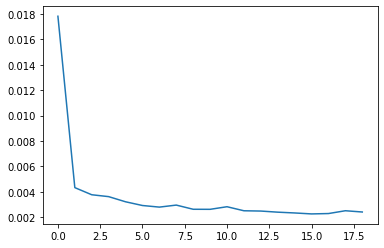

In [23]:
plt.plot(hist1.history['loss'])
plt.show

In [24]:
predictions1 = model1.evaluate(X_test, y_test_class)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0040 - tp: 85400.0000 - fp: 43.0000 - tn: 85400.0000 - fn: 43.0000 - precision: 0.9995 - recall: 0.9995 - auc: 0.9998


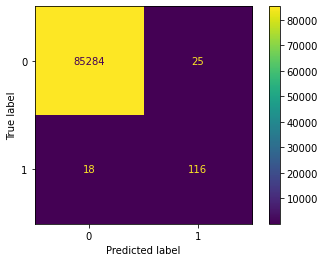

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.82      0.87      0.84       134

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
# Calculamos las predicciones del modelo
pred_1 = np.argmax(model1.predict(X_test), axis=1)

# Generamos la matriz de confusion
cm = confusion_matrix(np.array(y_test), pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Printeamos metricas
print(classification_report(np.array(y_test), pred_1, labels=[0, 1]))

## Modelo 2: undersampling

In [26]:
# Usamos la misma arquitectura, pero con una sola neurona en la capa de salida y muestra balanceada con undersmapling
# Usamos también otra función de acivación en la capa de salida: sigmoid

model2 = Sequential(name = "Model2-balanced-undersampling")     

model2.add(Dense(29, input_shape=(29,), activation='relu', name = 'Input-layer')) 
model2.add(Dense(10, activation = 'relu', name = 'Hidden1', kernel_initializer='HeNormal'))
model2.add(Dense(5, activation = 'relu', name = 'Hidden2', kernel_initializer='HeNormal'))
model2.add(Dense(1, activation = 'sigmoid', name = 'Output'))


model2.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics = metrics) 

model2.summary()

Model: "Model2-balanced-undersampling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 29)                870       
                                                                 
 Hidden1 (Dense)             (None, 10)                300       
                                                                 
 Hidden2 (Dense)             (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fijamos el numero de iteraciones que queremos y el tamaño del batch y calculamos las epochs en funcion de estos
n_iters = len(X_train_under)
batch_s = len(X_train_under) // 10
num_epochs = n_iters // (len(X_train_under) // batch_s)

hist2 = model2.fit(X_train_under, y_train_under, batch_size = batch_s, epochs = num_epochs, verbose = False, callbacks = [early_stop, tqdm_callback])

Training:   0%|                                                                                               …

Epoch 1/71


0/11                                                                                                          …

Epoch 2/71


0/11                                                                                                          …

Epoch 3/71


0/11                                                                                                          …

Epoch 4/71


0/11                                                                                                          …

Epoch 5/71


0/11                                                                                                          …

Epoch 6/71


0/11                                                                                                          …

Epoch 7/71


0/11                                                                                                          …

Epoch 8/71


0/11                                                                                                          …

Epoch 9/71


0/11                                                                                                          …

Epoch 10/71


0/11                                                                                                          …

Epoch 11/71


0/11                                                                                                          …

Epoch 12/71


0/11                                                                                                          …

<function matplotlib.pyplot.show(close=None, block=None)>

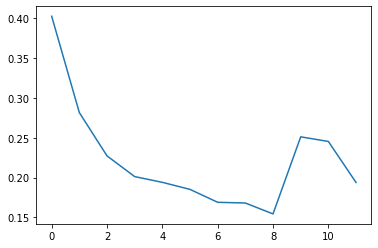

In [28]:
plt.plot(hist2.history['loss'])
plt.show

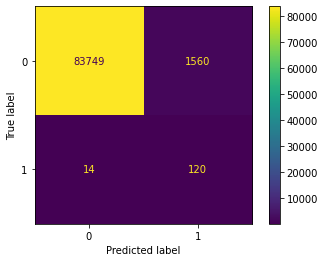

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85309
           1       0.07      0.90      0.13       134

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [30]:
# Calculamos las predicciones del modelo
pred_2 = np.rint(model2.predict(X_test))

# Generamos la matriz de confusion
cm = confusion_matrix(np.array(y_test), pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Printeamos metricas
print(classification_report(np.array(y_test), pred_2, labels=[0, 1]))

## Modelo 3: oversampling

In [31]:
# Usamos la misma arquitectura, pero con una sola neurona en la capa de salida y muestra balanceada con oversmapling

model3 = Sequential(name = "Model3-balanced-oversampling")     

model3.add(Dense(29, input_shape=(29,), activation='relu', name = 'Input-layer')) 
model3.add(Dense(10, activation = 'relu', name = 'Hidden1', kernel_initializer='HeNormal'))
model3.add(Dense(5, activation = 'relu', name = 'Hidden2', kernel_initializer='HeNormal'))
model3.add(Dense(1, activation = 'sigmoid', name = 'Output'))


model3.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics = metrics) 

model3.summary()

Model: "Model3-balanced-oversampling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 29)                870       
                                                                 
 Hidden1 (Dense)             (None, 10)                300       
                                                                 
 Hidden2 (Dense)             (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Fijamos el numero de iteraciones que queremos y el tamaño del batch y calculamos las epochs en funcion de estos
n_iters = len(X_train_over)
batch_s = len(X_train_over) // 100
num_epochs = n_iters // (len(X_train_over) // batch_s)

hist3 = model3.fit(X_train_over, y_train_over, batch_size = batch_s, epochs = num_epochs, verbose = False, callbacks = [early_stop, tqdm_callback])

Training:   0%|                                                                                               …

Epoch 1/3980


0/101                                                                                                         …

Epoch 2/3980


0/101                                                                                                         …

Epoch 3/3980


0/101                                                                                                         …

Epoch 4/3980


0/101                                                                                                         …

Epoch 5/3980


0/101                                                                                                         …

Epoch 6/3980


0/101                                                                                                         …

Epoch 7/3980


0/101                                                                                                         …

Epoch 8/3980


0/101                                                                                                         …

Epoch 9/3980


0/101                                                                                                         …

<function matplotlib.pyplot.show(close=None, block=None)>

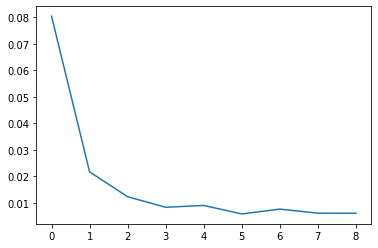

In [33]:
plt.plot(hist3.history['loss'])
plt.show

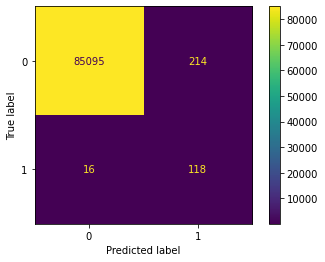

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.36      0.88      0.51       134

    accuracy                           1.00     85443
   macro avg       0.68      0.94      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
# Calculamos las predicciones del modelo
pred_3 = np.rint(model3.predict(X_test))

# Generamos la matriz de confusion
cm = confusion_matrix(np.array(y_test), pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Printeamos metricas
print(classification_report(np.array(y_test), pred_3, labels=[0, 1]))

Vemos que el mejor modelo es el modelo sin balancear pero con dos neuronas de salida seguido por el de over sampling, que ya tiene mucha menos precision y finalmente como esperavamos tenemos el de under sampling.

Vamos a probar a usar el modelo de over sampling con salida de dos categorias a ver si entre los dos mejoran lo que tenemos.

## Modelo 4: oversampling con 2 neuronas en la capa de salida

In [36]:
# Para poder usar dos capas en la neurona de salida, hemos de convertir la variable target en test, en categórica

y_train_over_class = tf.keras.utils.to_categorical(y_train_over, num_classes=2, dtype = 'int64')
y_test_class = tf.keras.utils.to_categorical(y_test, num_classes=2, dtype = 'int64')

In [37]:
# Definimos el primer modelo, de tipo Sequential por estar en un proble clasificatorio
# con funciones de activación ReLu para capas hidden y Softmax para la capa de salida, puesto que usamos dos neuronas

model4 = Sequential(name = "Model4-balanced-oversampling-and-2-neurones-in-output-layer")     

model4.add(Dense(128, input_shape=(29,), activation='relu', name = 'Input-layer')) 
model4.add(Dense(64, activation = 'relu', name = 'Hidden1', kernel_initializer='HeNormal'))
model4.add(Dense(32, activation = 'relu', name = 'Hidden2', kernel_initializer='HeNormal'))
model4.add(Dense(16, activation = 'relu', name = 'Hidden3', kernel_initializer='HeNormal'))
model4.add(Dense(8, activation = 'relu', name = 'Hidden4', kernel_initializer='HeNormal'))
model4.add(Dense(4, activation = 'relu', name = 'Hidden5', kernel_initializer='HeNormal'))
model4.add(Dense(2, activation = 'softmax', name = 'Output'))


model4.compile(Adam(learning_rate=0.05), 'categorical_crossentropy', metrics = metrics) 

model4.summary()

Model: "Model4-balanced-oversampling-and-2-neurones-in-output-layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 128)               3840      
                                                                 
 Hidden1 (Dense)             (None, 64)                8256      
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 Hidden3 (Dense)             (None, 16)                528       
                                                                 
 Hidden4 (Dense)             (None, 8)                 136       
                                                                 
 Hidden5 (Dense)             (None, 4)                 36        
                                                                 
 Output

In [38]:
# Fijamos el numero de iteraciones que queremos y el tamaño del batch y calculamos las epochs en funcion de estos
n_iters = len(X_train_over) // 10
batch_s = len(X_train_over) // 100
num_epochs = n_iters // (len(X_train_over) // batch_s)

hist4 = model4.fit(X_train_over, y_train_over_class, batch_size = batch_s, epochs = num_epochs, verbose = False, callbacks = [early_stop, tqdm_callback])

Training:   0%|                                                                                               …

Epoch 1/398


0/101                                                                                                         …

Epoch 2/398


0/101                                                                                                         …

Epoch 3/398


0/101                                                                                                         …

Epoch 4/398


0/101                                                                                                         …

Epoch 5/398


0/101                                                                                                         …

Epoch 6/398


0/101                                                                                                         …

Epoch 7/398


0/101                                                                                                         …

Epoch 8/398


0/101                                                                                                         …

Epoch 9/398


0/101                                                                                                         …

Epoch 10/398


0/101                                                                                                         …

Epoch 11/398


0/101                                                                                                         …

Epoch 12/398


0/101                                                                                                         …

Epoch 13/398


0/101                                                                                                         …

Epoch 14/398


0/101                                                                                                         …

Epoch 15/398


0/101                                                                                                         …

<function matplotlib.pyplot.show(close=None, block=None)>

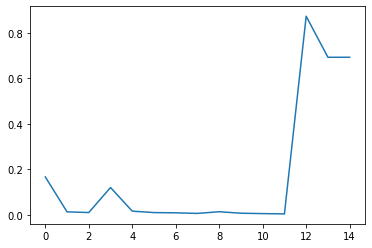

In [40]:
plt.plot(hist4.history['loss'])
plt.show

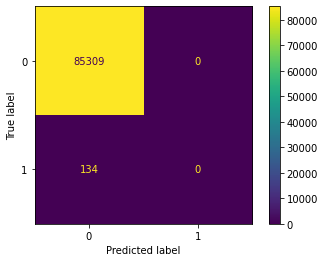

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.00      0.00      0.00       134

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
# Calculamos las predicciones del modelo
pred_4 = np.argmax(model4.predict(X_test), axis=1)

# Generamos la matriz de confusion
cm = confusion_matrix(np.array(y_test), pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Printeamos metricas
print(classification_report(np.array(y_test), pred_4, labels=[0, 1]))

Vemos una mejora respecto al modelo de over sampling pero sigue siendo peor que el modelo sin balancear con dos neuronas de salida.

## Modelo 5: sin balancear y con 2 neuronas en la capa de salida y mas layers

In [42]:
# Para poder usar dos capas en la neurona de salida, hemos de convertir la variable target en test, en categórica

y_train_class = tf.keras.utils.to_categorical(y_train, num_classes=2, dtype = 'int64')
y_test_class = tf.keras.utils.to_categorical(y_test, num_classes=2, dtype = 'int64')

In [43]:
# Definimos el primer modelo, de tipo Sequential por estar en un proble clasificatorio
# con funciones de activación ReLu para capas hidden y Softmax para la capa de salida, puesto que usamos dos neuronas

model5 = Sequential(name = "Model1-non-balanced-data-and-2-neurones-in-output-layer")     

model5.add(Dense(128, input_shape=(29,), activation='relu', name = 'Input-layer')) 
model5.add(Dense(64, activation = 'relu', name = 'Hidden1', kernel_initializer='HeNormal'))
model5.add(Dense(32, activation = 'relu', name = 'Hidden2', kernel_initializer='HeNormal'))
model5.add(Dense(16, activation = 'relu', name = 'Hidden3', kernel_initializer='HeNormal'))
model5.add(Dense(8, activation = 'relu', name = 'Hidden4', kernel_initializer='HeNormal'))
model5.add(Dense(4, activation = 'relu', name = 'Hidden5', kernel_initializer='HeNormal'))
model5.add(Dense(2, activation = 'softmax', name = 'Output'))


model5.compile(Adam(learning_rate=0.05), 'categorical_crossentropy', metrics = metrics) 

model5.summary()

Model: "Model1-non-balanced-data-and-2-neurones-in-output-layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 128)               3840      
                                                                 
 Hidden1 (Dense)             (None, 64)                8256      
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 Hidden3 (Dense)             (None, 16)                528       
                                                                 
 Hidden4 (Dense)             (None, 8)                 136       
                                                                 
 Hidden5 (Dense)             (None, 4)                 36        
                                                                 
 Output (De

In [44]:
# Fijamos el numero de iteraciones que queremos y el tamaño del batch y calculamos las epochs en funcion de estos
n_iters = len(X_train)
batch_s = len(X_train) // 100
num_epochs = n_iters // (len(X_train) // batch_s)

hist5 = model5.fit(X_train, y_train_class, batch_size = batch_s, epochs = num_epochs, verbose = False, callbacks = [early_stop, tqdm_callback])

Training:   0%|                                                                                               …

Epoch 1/1993


0/101                                                                                                         …

Epoch 2/1993


0/101                                                                                                         …

Epoch 3/1993


0/101                                                                                                         …

Epoch 4/1993


0/101                                                                                                         …

Epoch 5/1993


0/101                                                                                                         …

Epoch 6/1993


0/101                                                                                                         …

Epoch 7/1993


0/101                                                                                                         …

Epoch 8/1993


0/101                                                                                                         …

Epoch 9/1993


0/101                                                                                                         …

Epoch 10/1993


0/101                                                                                                         …

Epoch 11/1993


0/101                                                                                                         …

Epoch 12/1993


0/101                                                                                                         …

Epoch 13/1993


0/101                                                                                                         …

Epoch 14/1993


0/101                                                                                                         …

Epoch 15/1993


0/101                                                                                                         …

Epoch 16/1993


0/101                                                                                                         …

Epoch 17/1993


0/101                                                                                                         …

Epoch 18/1993


0/101                                                                                                         …

<function matplotlib.pyplot.show(close=None, block=None)>

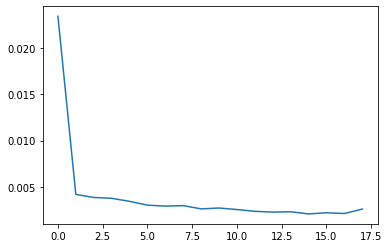

In [45]:
plt.plot(hist5.history['loss'])
plt.show

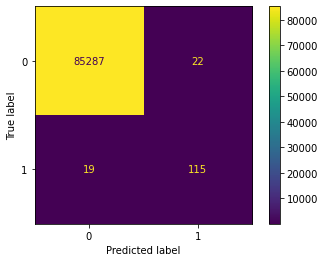

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.84      0.86      0.85       134

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
# Calculamos las predicciones del modelo
pred_5 = np.argmax(model5.predict(X_test), axis=1)

# Generamos la matriz de confusion
cm = confusion_matrix(np.array(y_test), pred_5)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Printeamos metricas
print(classification_report(np.array(y_test), pred_5, labels=[0, 1]))

## Conclusiones

Vemos que al augmentar mucho las capas tampoco conseguimos una gran mejora en el rendimiento de la red neuronal, de hecho vemos que en todos los casos con pocas iteraciones la red neuronal consigue converger.

Con el under sampling hemos visto que al eliminar demasiados datos teniamos problemas para que la red consiguiera despues identificar las transacciones no fraudulentas.

Y por otro lado con el over sampling al ampliar una muestra tan pequeña el problema que podemos tener, y debe estar pasando, es que tenemos gran parte de nuestra muestra en un espació  muy pequeño, i.e. los datos de transacciones fraudulentas pasan a ser la mitad de la muestra pero estan muy agrupados en un mismo sitio, y esto puede generar que algunas transacciones no fraudulentas que esten cerca no consigan "transmitir" su informacion a la red.

Finalmente en los dos modelos con los datos balanceados si no paramos el entrenamiento o lo hacemos demasiado tarde es muy posible que acabemos con una red que no detecta casos fraudulentos ya que estos son la mayor parte del espació y hay tan pocos datos de transacciones fraudulentas que el error es muy pequeño igualmente.